Kopal Garg

Team members: Rohan Ajwani, and Yujie Chen

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from scipy import arange


Q2

In [ ]:
# 2 a. Load the dataset
def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X, y, features

In [ ]:
# 2 b. Describe and summarize the data in terms of # data points, dimensions, target, etc.
def describe_data(X, y, features):
  print("Number of data points:", y.shape)
  print("Dimensions of the dataset", X.shape)

  # Plot the distribution of the target variable
  sns.displot(y, bins=30, kde=True);
  print("y min: {}, max: {}, mean: {}, stdev: {}".format(min(y), max(y),
                                                       np.mean(y), np.std(y)))
  
  f, ax = plt.subplots(figsize=(10, 8))
  # Plot the correlations matrix to display the linear relations between pairs of features
  merged = pd.DataFrame(X,columns=features)
  merged['MEDV'] = y
  corr = merged.corr()

  sns.heatmap(corr, 
              cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [ ]:
# 2.c

def visualize(X, y, features):
    plt.figure(figsize=(20, 5))
    feature_count = X.shape[1]

    # i: index
    for i in range(feature_count):
        plt.subplot(3, 5, i + 1)
        plt.scatter(X[:, i], y, marker='o')
        plt.title(features[i])
        plt.xlabel(features[i])
        plt.ylabel('MEDEV')

    plt.tight_layout()
    plt.legend()
    plt.show()

In [ ]:
def test_train_split(X, y):
  # set seed
  np.random.seed(42)
  indices = np.random.permutation(X.shape[0])
  ratio = int(0.7*X.shape[0])
  train_idx, test_idx = indices[:ratio], indices[ratio:]
  X_train, X_test = X[train_idx,:], X[test_idx,:]
  y_train, y_test = y[train_idx], y[test_idx]
  return X_train, X_test, y_train, y_test


In [ ]:
# 2 d
def fit_regression(X, y):
  # X with the bias term
  X_b = np.vstack([np.ones(X.shape[0]), X.T]).T 
  # l2_loss_no_regularizer
  # Lec 3 Slide 21: w^* = (X^T X)^-1 X^T y
  w = np.linalg.solve(np.dot(np.transpose(X_b), X_b), np.dot(np.transpose(X_b), y))
  return w

In [ ]:
def compute_metrics(y_hat, y, X):
  MSE = sum((y_hat - y)**2)/X.shape[0]
  RMSE = np.power(MSE, .5)
  MAE = sum(np.abs(y_hat - y))/X.shape[0]
  return MSE, RMSE, MAE

In [ ]:
def main():
    ### Q2a: Load the data
    X, y, features = load_data()
    print("Features: {}".format(features))
    ### Q2b: Describe data
    describe_data(X,y,features)

    ### Q2c: Visualize the features
    visualize(X, y, features)

    # Split data into train and test
    X_train, X_test, y_train, y_test = test_train_split(X,y)

    ### Q2d: Fit regression model
    w_train = fit_regression(X_train, y_train)

    ### Q2e: Tabulate each feature with weight
    w_f = pd.DataFrame(w_train[1:], features)
    w_f_abs = pd.DataFrame(abs(w_train[1:]), features)
    print(w_f)
    # sort in descending order - absolute weights
    print("sorted:")
    print(w_f_abs.sort_values(by=[0],  ascending=False).head())

    ### Q2f: Test performance, Q1g: Compute fitted values, MSE, etc.
    X_test_b = np.vstack([np.ones(X_test.shape[0]), X_test.T]).T # X with the bias term
    y_hat_test = np.dot(X_test_b, w_train)
    MSE, RMSE, MAE = compute_metrics(y_hat_test, y_test, X_test_b)
    print('Test set performance: MSE: {0}, RMSE: {1}, MAE: {2}'.format(MSE, RMSE, MAE))




Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Number of data points: (506,)
Dimensions of the dataset (506, 13)
y min: 5.0, max: 50.0, mean: 22.532806324110677, stdev: 9.188011545278203


No handles with labels found to put in legend.


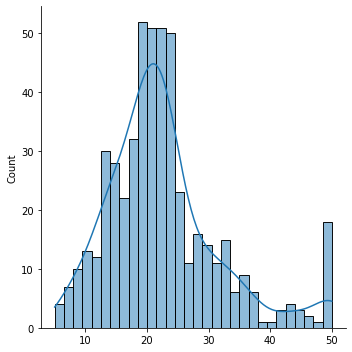

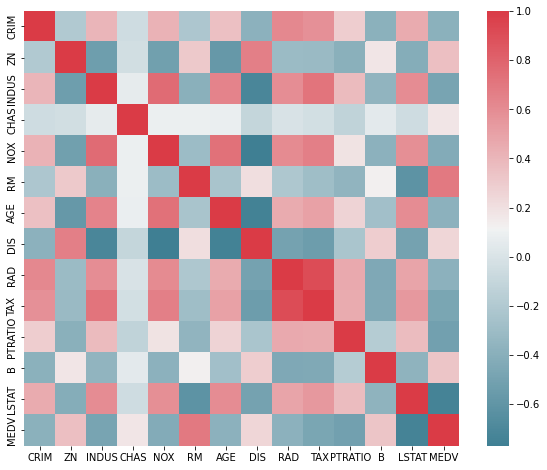

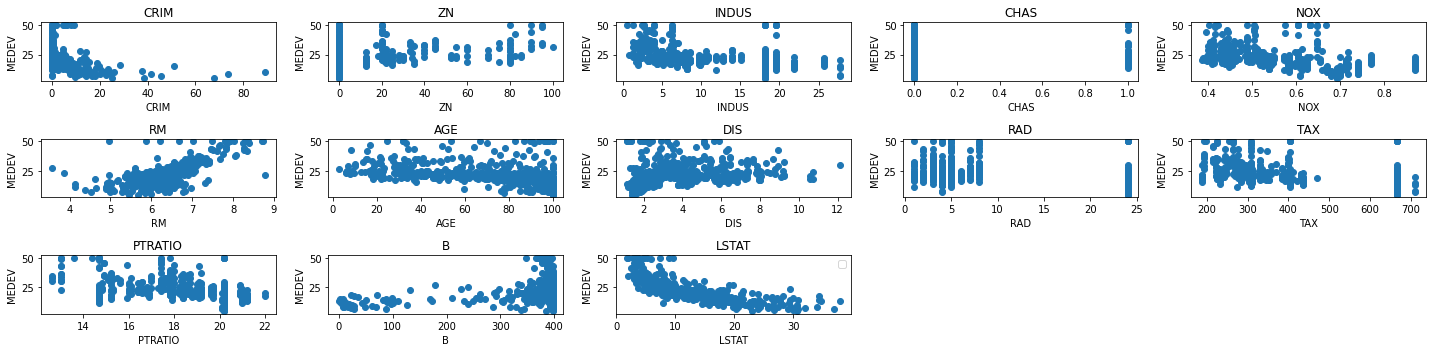

                 0
CRIM     -0.115457
ZN        0.061744
INDUS    -0.005507
CHAS      2.270499
NOX     -17.957172
RM        3.338829
AGE       0.014306
DIS      -1.579986
RAD       0.365537
TAX      -0.015470
PTRATIO  -0.882199
B         0.007193
LSTAT    -0.562588
sorted:
                 0
NOX      17.957172
RM        3.338829
CHAS      2.270499
DIS       1.579986
PTRATIO   0.882199
Test set performance: MSE: 22.337011563626145, RMSE: 4.726204773772095, MAE: 3.383743754540305


In [ ]:
main()

Q1 e

In [ ]:
#lambda
l = np.arange(0,10,0.1)
error,bias,variance = [],[],[]
min_error = 1e6
min_lam = 0

for i in l:
  # given conditions
  mu = 1
  SqSigma = 9
  n = 10

  # Q1.d
  bias_term = np.power( ((mu*i)/(1+i) ) ,2)
  variance_term = SqSigma / (n*(np.power(1+i,2)))
  error.append(bias_term + variance_term)
  variance.append(variance_term)
  bias.append(bias_term)
  if (bias_term+variance_term < min_error):
    min_error = bias_term + variance_term
    min_lam = i

min error 0.4736842105263158 occurs at lambda value 0.9


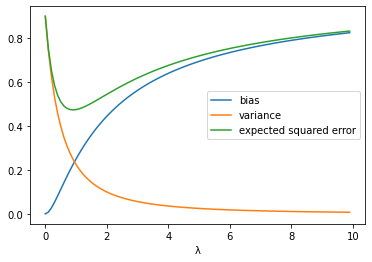

In [ ]:
plt.plot(l, bias, label = 'bias')
plt.plot(l, variance, label='variance')
plt.plot(l, error, label = 'expected squared error')
plt.xlabel("λ")
plt.legend()
print("min error {} occurs at lambda value {}".format(min_error, min_lam))

Q3

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
np.random.seed(0)
from scipy.special import logsumexp

In [ ]:
# load boston housing prices dataset
boston = load_boston()
x = boston['data']
N = x.shape[0]
x = np.concatenate((np.ones((506,1)),x),axis=1) #add constant one feature - no bias needed
d = x.shape[1]
y = boston['target']

In [ ]:
idx = np.random.permutation(range(N))

In [ ]:
#helper function
def l2(A, B):
    '''
    Input: A is a Nxd matrix
           B is a Mxd matirx
    Output: dist is a NxM matrix where dist[i,j] is the square norm between A[i,:] and B[j,:]
    i.e. dist[i,j] = ||A[i,:]-B[j,:]||^2
    '''
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    return dist

In [ ]:
#to implement
def LRLS(test_datum, x_train, y_train, tau, lam=1e-5):
    '''
    Given a test datum, it returns its prediction based on locally weighted regression

    Input: test_datum is a dx1 test vector
           x_train is the N_train x d design matrix
           y_train is the N_train x 1 targets vector
           tau is the local reweighting parameter
           lam is the regularization parameter
    output is y_hat the prediction on test_datum
    '''
    
    l2_dist = -l2(test_datum.transpose(), x_train)/(2*tau**2)

    # exp(−||x−x(i)||2 /2τ2))
    numerator = np.exp(l2_dist)

    # sum(exp(−||x−x(i)||2 /2τ2)))
    denominator = np.exp(logsumexp(l2_dist))

    # diagonal matrix A
    A = np.diagflat(numerator/denominator)

    # XT*A*X 
    XTAX = np.dot(np.dot(np.transpose(x_train),A), x_train) 

    # XT*A*Y
    XTAY = np.dot(np.dot(np.transpose(x_train), A),y_train)

    # w = (XT*A*X + lam*I )^-1 (XT*A*Y)
    w = np.linalg.solve(XTAX + lam*np.identity(XTAX.shape[0]), XTAY)    

    # predicted y
    prediction = np.dot(w, test_datum)

    return prediction.flatten()

In [ ]:
#helper function
def run_on_fold(x_test, y_test, x_train, y_train, taus):
    '''
    Input: x_test is the N_test x d design matrix
           y_test is the N_test x 1 targets vector        
           x_train is the N_train x d design matrix
           y_train is the N_train x 1 targets vector
           taus is a vector of tau values to evaluate
    output: losses a vector of average losses one for each tau value
    '''
    N_test = x_test.shape[0]
    losses = np.zeros(taus.shape)
    for j,tau in enumerate(taus):

        predictions =  np.array([LRLS(x_test[i,:].reshape(d,1),x_train,y_train, tau) \
                        for i in range(N_test)])

        losses[j] = ((predictions.flatten()-y_test.flatten())**2).mean()
    return losses

In [ ]:
#to implement
def run_k_fold(x, y, taus, k):
    '''
    Input: x is the N x d design matrix
           y is the N x 1 targets vector    
           taus is a vector of tau values to evaluate
           K in the number of folds
    output is losses a vector of k-fold cross validation losses one for each tau value
    '''
    N = x.shape[0]
    losses = np.zeros(len(taus))
    indices = np.array_split(idx,k)
    
    for i in range(k):
        train_index = [j for j in idx if j not in indices[i]]
        x_test = np.take(x, indices[i], 0)
        x_train = np.take(x, train_index, 0)
        y_test = np.take(y, indices[i], 0)
        y_train = np.take(y, train_index, 0)

        losses = losses + run_on_fold(x_test, y_test, 
                                      x_train, y_train, taus)
    return losses/k

min loss = 12.016759888179157


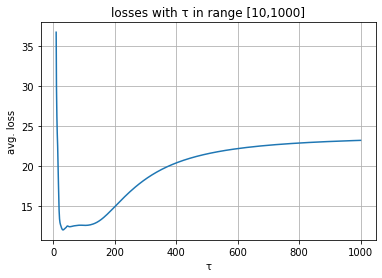

In [ ]:
if __name__ == "__main__":
    # In this exercise we fixed lambda (hard coded to 1e-5) and only set tau value. Feel free to play with lambda as well if you wish
    taus = np.logspace(1.0,3,200)

    losses = run_k_fold(x,y,taus,k=5)
    
    plt.plot(taus, losses)
    ax = plt.gca()
    ax.grid()
    plt.title('losses with τ in range [10,1000]')
    plt.xlabel("τ")
    plt.ylabel("avg. loss")
    print("min loss = {}".format(losses.min()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'avg. loss')

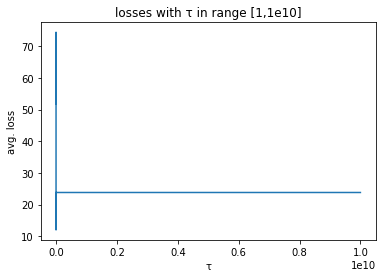

In [ ]:
#tau close to infinity 
taus_large = np.logspace(0.1, 10, 100)
losses_large = run_k_fold(x,y, taus_large,k=5)
    
plt.plot(taus_large, losses_large)
plt.title('losses with τ in range [1,1e10]')
plt.xlabel("τ")
plt.ylabel("avg. loss")

NOTE: error for values close to 0 is undefined.

Text(0, 0.5, 'avg. loss')

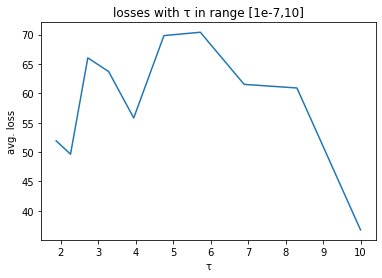

In [ ]:
#tau close to 0
np.seterr(divide='ignore', invalid='ignore')
taus_small = np.logspace(-7, 1,100, endpoint=True)
losses_small = run_k_fold(x,y,taus_small,k=5)

plt.plot(taus_small, losses_small)
plt.title('losses with τ in range [1e-7,10]')
plt.xlabel("τ")
plt.ylabel("avg. loss")